In [3]:
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 

x = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0]) # dataset x 
y = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8]) # dataset y 
m_list = np.zeros(len(x)) # membuat list awal untuk m, berisi angka 0 sebanyak data x 
c_list = np.zeros(len(x)) # membuat list awal untuk c, berisi angka 0 sebanyak data x 

for i in range(len(x)-1): # memulai loop yang akan mengiterasi indeks array x 
    # range(len(x)-1) memastikan loop dimulai dari elemen pertama 
    # hingga kedua terakhir     
    m = (y[i+1]-y[i])/(x[i+1]-x[i]) # menghitung m 
    c1 = (y[i]-m*x[i])               
    # menghitung c1 
    c2 = (y[i+1]-m*x[i+1])            
    # menghitung c2 
    print("Untuk (%.1f, %.1f) dan (%.1f, %.1f), m = %.2f and c1 = %.2f, c2 = %.2f." % (x[i], y[i], x[i+1], y[i+1], m, c1, c2)) # menampilkan hasil 
    m_list[i] = m  # memasukkan hasil perhitungan m ke list 
    c_list[i] = c1 # memasukkan hasil perhitungan c ke list 


Untuk (0.5, 0.5) dan (2.0, 0.4), m = -0.07 and c1 = 0.53, c2 = 0.53.
Untuk (2.0, 0.4) dan (4.0, 0.3), m = -0.05 and c1 = 0.50, c2 = 0.50.
Untuk (4.0, 0.3) dan (5.0, 0.1), m = -0.20 and c1 = 1.10, c2 = 1.10.
Untuk (5.0, 0.1) dan (7.0, 0.9), m = 0.40 and c1 = -1.90, c2 = -1.90.
Untuk (7.0, 0.9) dan (9.0, 0.8), m = -0.05 and c1 = 1.25, c2 = 1.25.


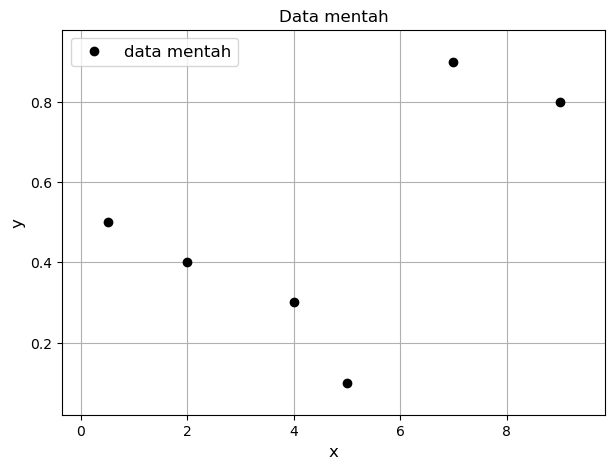

In [6]:
import matplotlib.pyplot as plt

def plot_data_mentah(x, y, ax): 
    """plot x vs y pada sumbu ax,  
    menambahkan label sumbu dan menggunakan grid 
    """ 
    ax.plot(x, y, 'ko', label='data mentah') 
    ax.set_xlabel('x', fontsize=12) 
    ax.set_ylabel('y', fontsize=12) 
    ax.grid(True) 

# Set up grafik 
fig = plt.figure(figsize=(7, 5)) 
ax1 = fig.add_subplot(111) 
ax1.margins(0.1) 

# memplot data mentah 
plot_data_mentah(x, y, ax1) 

# menambahkan legend 
ax1.legend(loc='best', fontsize=12)
# menambahkan judul grafik 
ax1.set_title('Data mentah', fontsize=12) 
plt.show()

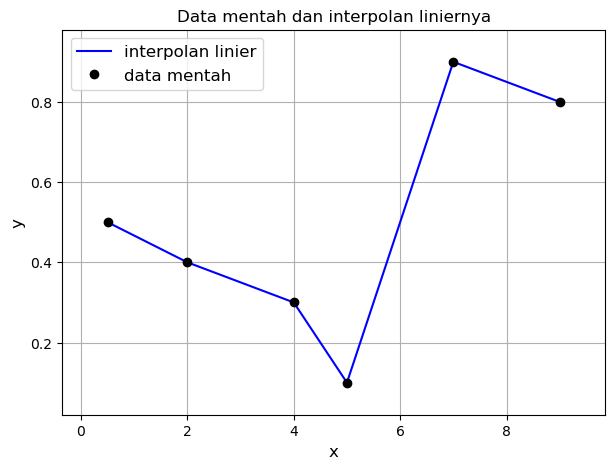

In [7]:
fig = plt.figure(figsize=(7, 5)) 
ax1 = fig.add_subplot(111) 
ax1.margins(0.1) 
# Plot interpolasi linear 
# Kita melakukannya hanya dengan menghubungkan dua titik dengan garis lurus 
# dan hal ini dilakukan secara default oleh fungsi plot 
ax1.plot(x, y, 'b', label='interpolan linier') 
# plot data mentah ditumpuk menggunakan fungsi sebelumnya 
plot_data_mentah(x, y, ax1) 
# menambahkan legend 
ax1.legend(loc='best', fontsize=12) 
# menambahkan judul grafik 
ax1.set_title('Data mentah dan interpolan liniernya', fontsize=12) 
plt.show()

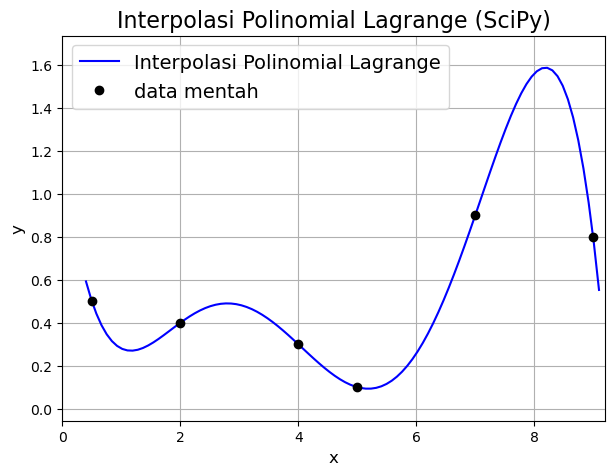

In [8]:
import scipy.interpolate as si 
 
### data mentah kita sebelumnya 
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0]) 
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8]) 
 
# membuat polinomial Lagrange untuk titik data yang diberikan 
lp = si.lagrange(xi, yi) 
# di atas, kita mengeksekusi 'import scipy.interpolate as si' 
# sehingga baris ini memanggil fungsi 'lagrange' dari  
# sub paket 'interpolate' yang ada di dalam scipy. 
 
# Evaluasi fungsi ini pada resolusi tinggi (100 titik) sehingga 
# kita mendapatkan garis halus yang baik saat kita memplot polinomialnya 
x = np.linspace(0.4, 9.1, 100) 
 
# mengatur grafik 
fig = plt.figure(figsize=(7, 5)) 
ax1 = fig.add_subplot(111) 
ax1.margins(0.1) 
 
# mem-plot (x,y)=(x,lp(x)) pada sumbu dengan label ax1 
ax1.plot(x, lp(x), 'b', label='Interpolasi Polinomial Lagrange') 
 
# menumpuk data mentah pada sumbu yang sama 
plot_data_mentah(xi, yi, ax1) 
ax1.set_title('Interpolasi Polinomial Lagrange (SciPy)', fontsize=16) 
 
# Add a legend 
ax1.legend(loc='best', fontsize=14) 
plt.xlim(0,9.2) 
 
plt.show() 

Coding Time Halaman 100

Nomor 1 (a)

In [10]:
import numpy as np
# Fungsi menghitung polinomial Lagrange
def lagrange(x, y, xi):
    n = len(x)
    yi = 0
    for i in range(n):
        # Menghitung basis Lagrange
        L = 1
        for j in range(n):
            if j != i:
                L *= (xi - x[j]) / (x[i] - x[j])
        # Menambahkan titik data ke interpolasi
        yi += y[i] * L
    return yi
# Data waktu dan temperatur Gunung Bromo
x = np.array([6, 9, 12, 15, 18, 20, 21, 24])
y = np.array([15, 18, 25, 22, 20, 19, 17, 16])
# Titik untuk interpolasi
xi = np.arange(6, 25, 1)
# Interpolasi dengan polinomial Lagrange
yi = lagrange(x, y, xi)
# Menampilkan hasil interpolasi
print("Hasil Interpolasi Temperatur Gunung Bromo:")
for jam, temperatur in zip(xi, yi):
    print(f"Jam: {jam}, Temperatur: {temperatur:.2f} °C")

Hasil Interpolasi Temperatur Gunung Bromo:
Jam: 6, Temperatur: 15.00 °C
Jam: 7, Temperatur: 12.89 °C
Jam: 8, Temperatur: 14.58 °C
Jam: 9, Temperatur: 18.00 °C
Jam: 10, Temperatur: 21.49 °C
Jam: 11, Temperatur: 23.97 °C
Jam: 12, Temperatur: 25.00 °C
Jam: 13, Temperatur: 24.68 °C
Jam: 14, Temperatur: 23.47 °C
Jam: 15, Temperatur: 22.00 °C
Jam: 16, Temperatur: 20.81 °C
Jam: 17, Temperatur: 20.17 °C
Jam: 18, Temperatur: 20.00 °C
Jam: 19, Temperatur: 19.83 °C
Jam: 20, Temperatur: 19.00 °C
Jam: 21, Temperatur: 17.00 °C
Jam: 22, Temperatur: 14.09 °C
Jam: 23, Temperatur: 12.17 °C
Jam: 24, Temperatur: 16.00 °C


(b)

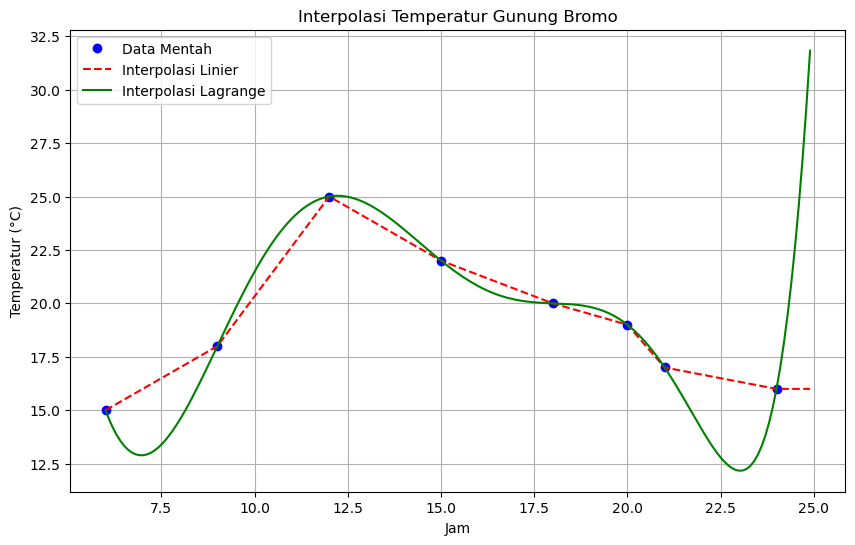

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi menghitung polinomial Lagrange
def lagrange(x, y, xi):
    n = len(x)
    yi = np.zeros_like(xi)
    for i in range(n):
        # Menghitung basis Lagrange
        L = np.ones_like(xi)
        for j in range(n):
            if j != i:
                L *= (xi - x[j]) / (x[i] - x[j])
        # Menambahkan titik data ke interpolasi
        yi += y[i] * L
    return yi

# Data waktu dan temperatur Gunung Bromo
x = np.array([6, 9, 12, 15, 18, 20, 21, 24])
y = np.array([15, 18, 25, 22, 20, 19, 17, 16])

# Titik waktu untuk interpolasi
xi = np.arange(6, 25, 0.1)

# Interpolasi linier
yi_linier = np.interp(xi, x, y)

# Interpolasi polinomial Lagrange
yi_lagrange = lagrange(x, y, xi)

# Plot data mentah, hasil interpolasi linier, dan interpolasi Lagrange
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='Data Mentah')
plt.plot(xi, yi_linier, 'r--', label='Interpolasi Linier')
plt.plot(xi, yi_lagrange, 'g-', label='Interpolasi Lagrange')
plt.title('Interpolasi Temperatur Gunung Bromo')
plt.xlabel('Jam')
plt.ylabel('Temperatur (°C)')
plt.legend()
plt.grid(True)
plt.show()